# TD 4
---
# Geopandas first steps

## filtrer les communes corses et afficher une carte

In [1]:
import geopandas as gpd
communes = gpd.read_file(r'../../gis/communes/communes_arrond_pop_epci_simplified.shp')

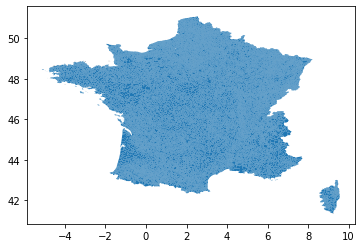

In [2]:
# carte de toutes les communes
communes.plot()

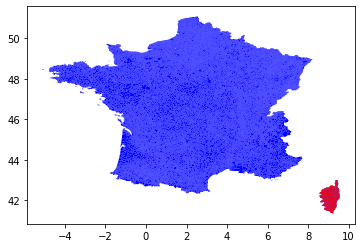

In [3]:
# carte de toutes les communes avec en rouge les communes en corse
communes_corse = communes.loc[communes['insee'].apply(lambda x: '2A' in x or '2B' in x)]
ax = communes.plot(color='b')
communes_corse.plot(color='r', ax=ax)

## Calculer et cartographier la distance à vol d'oiseau entre chaque commune corse et la commune d'Ajaccio

In [4]:
communes_corse.crs = {'init': 'epsg:4326'}
communes_corse = communes_corse.to_crs(epsg=2154)

C:\Users\rgoix\AppData\Local\Continuum\anaconda3\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [5]:
ajaccio_geom = communes_corse.loc[communes_corse['nom']=='Ajaccio', 'geometry'].iloc[0]
communes_corse['distance'] = communes_corse.distance(ajaccio_geom)

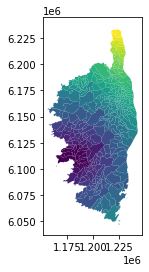

In [6]:
communes_corse.plot('distance')